In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import warnings
# To ignore all warnings (not recommended during development)
warnings.filterwarnings("ignore")

## Introduction

Maternal health is a key indicator of healthcare quality and equity in any region. This project aims to analyze maternal health data using Python and uncover trends, disparities, and potential areas of concern. The dataset, sourced from IBM’s Data Platform, contains various dimensions such as geography (Area), indicators, goals, targets, sectors, subgroups, and corresponding data values. The goal of this analysis is to gain insights into maternal health performance, track progress towards health goals, and identify gaps in maternal care across different areas.

We use Python libraries like Pandas, Matplotlib, and Seaborn to clean, analyze, and visualize the dataset effectively.




In [19]:
# Install necessary packages (use these in IBM Cloud notebook if needed)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [20]:
# Load the dataset (upload it manually to IBM Cloud Notebook or load locally)
df = pd.read_csv("/kaggle/input/maternal-health-dataset/IBM DATASET.csv", encoding='latin1')
 # change file name if needed
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AreaID             1295 non-null   object
 1   AreaName           1295 non-null   object
 2   TimePeriod         1295 non-null   object
 3   Source             1295 non-null   object
 4   Sector             1295 non-null   object
 5   Subsector          1295 non-null   object
 6   Goal               1295 non-null   object
 7   Target             1295 non-null   object
 8   Indicator          1295 non-null   object
 9   Unit               1295 non-null   object
 10  SubgroupDimension  1295 non-null   object
 11  Subgroup           1295 non-null   object
 12  SubgroupOrder      1295 non-null   int64 
 13  DataValue          1295 non-null   object
 14  Footnote           18 non-null     object
dtypes: int64(1), object(14)
memory usage: 151.9+ KB


In [21]:
# Remove unnecessary whitespaces in column names
df.columns = df.columns.str.strip()

# Convert DataValue column to numeric (some rows may have non-numeric characters)
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

# Check for null values
print(df.isnull().sum())

# Drop rows with missing DataValue
df_clean = df.dropna(subset=['DataValue'])

# Optional: Drop columns not needed
df_clean = df_clean.drop(columns=['Footnote'])


AreaID                  0
AreaName                0
TimePeriod              0
Source                  0
Sector                  0
Subsector               0
Goal                    0
Target                  0
Indicator               0
Unit                    0
SubgroupDimension       0
Subgroup                0
SubgroupOrder           0
DataValue              16
Footnote             1277
dtype: int64


In [22]:
# Summary statistics
print(df_clean['DataValue'].describe())

# Unique indicators
print("Unique indicators:", df_clean['Indicator'].nunique())


count    1.279000e+03
mean     6.163924e+05
std      6.409021e+06
min     -7.380000e+01
25%      4.560000e+00
50%      3.831000e+01
75%      9.879500e+01
max      1.021313e+08
Name: DataValue, dtype: float64
Unique indicators: 256


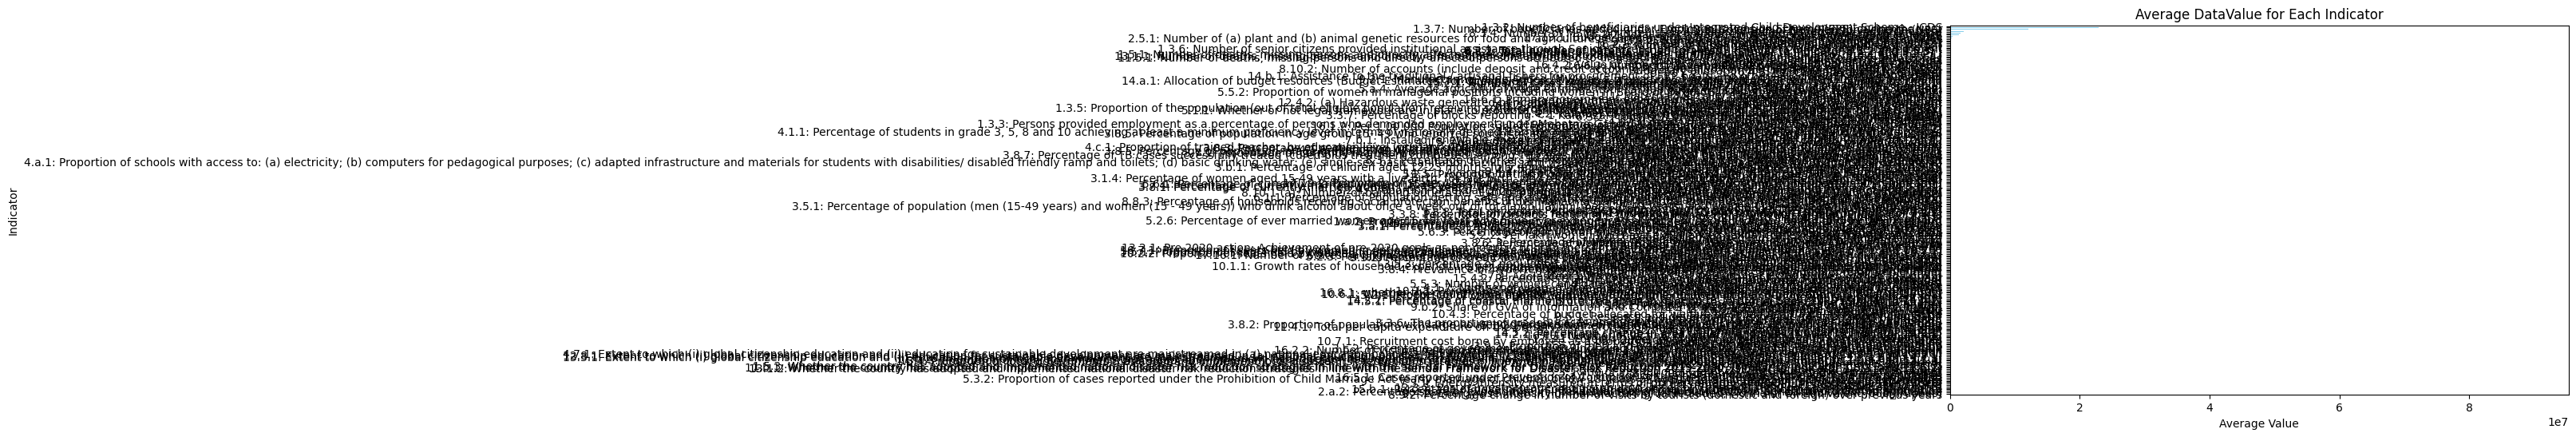

In [23]:
# Plot average DataValue for each Indicator
plt.figure(figsize=(10, 6))
df_grouped = df_clean.groupby('Indicator')['DataValue'].mean().sort_values()
df_grouped.plot(kind='barh', color='skyblue')
plt.title("Average DataValue for Each Indicator")
plt.xlabel("Average Value")
plt.ylabel("Indicator")
plt.tight_layout()
plt.show()


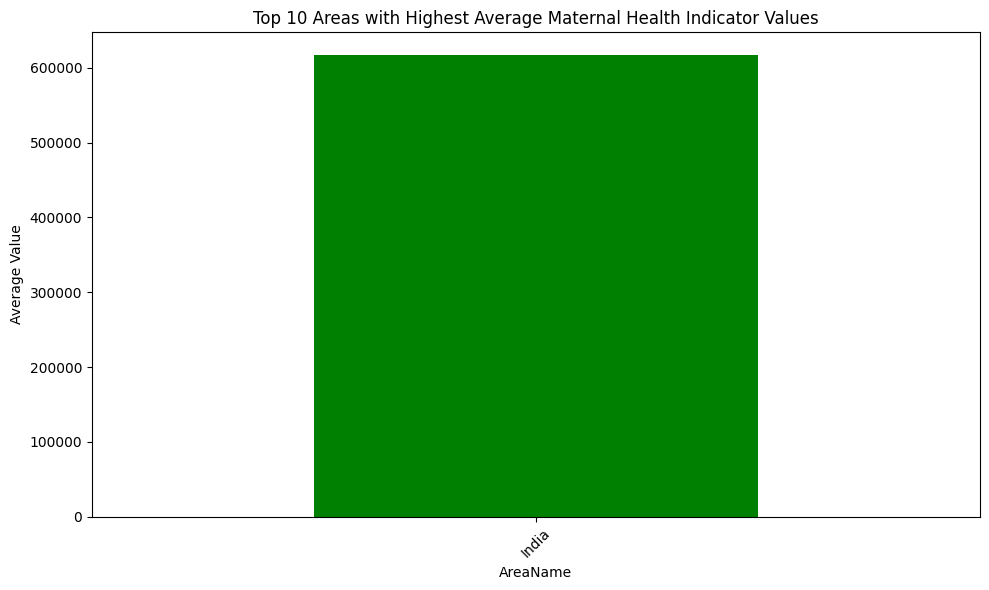

In [24]:
# Top 10 Areas with highest maternal health values
top_areas = df_clean.groupby('AreaName')['DataValue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='green')
plt.title("Top 10 Areas with Highest Average Maternal Health Indicator Values")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


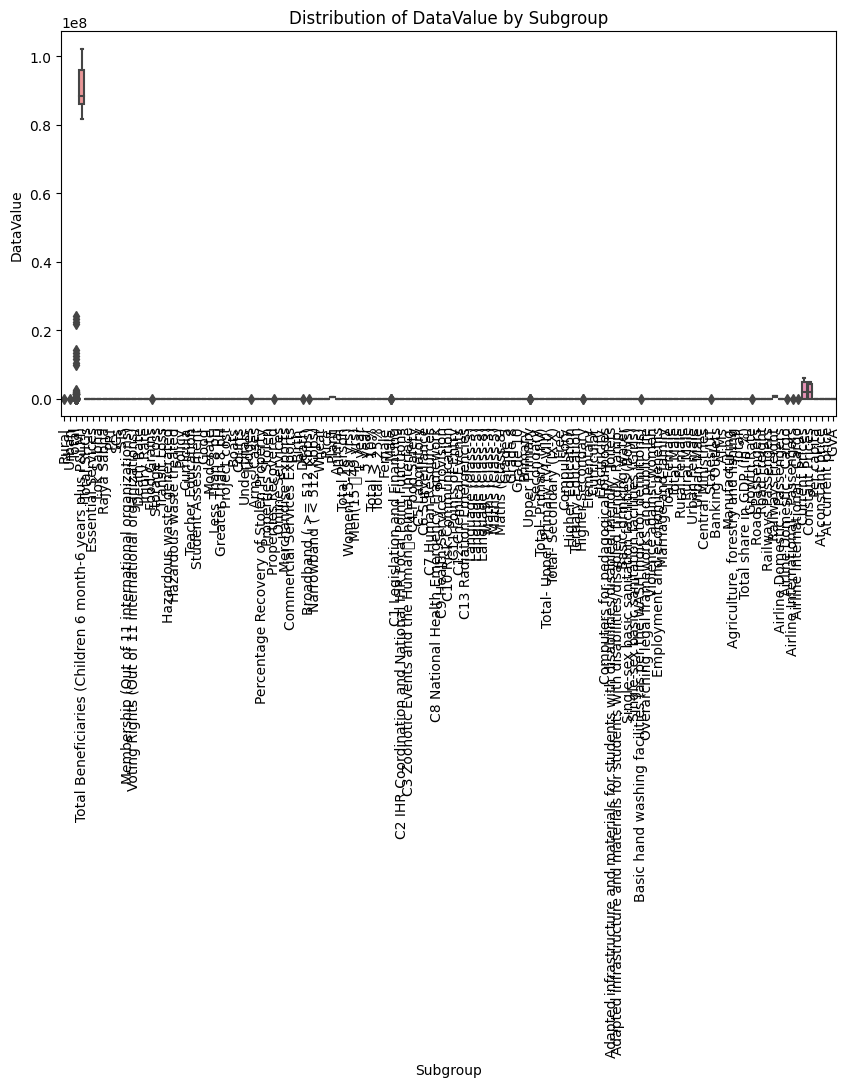

In [25]:
# Subgroup comparison
plt.figure(figsize=(10, 5))
sns.boxplot(x='Subgroup', y='DataValue', data=df_clean)
plt.title("Distribution of DataValue by Subgroup")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
mmr_df = df[df['Indicator'].str.contains("Maternal Mortality Ratio", case=False)]
top_mmr = mmr_df.groupby('AreaName')['DataValue'].mean().sort_values(ascending=False).head(10)
print(top_mmr)


AreaName
India    121.666667
Name: DataValue, dtype: float64


<Axes: title={'center': 'India Maternal Mortality Ratio Over Time'}, xlabel='TimePeriod'>

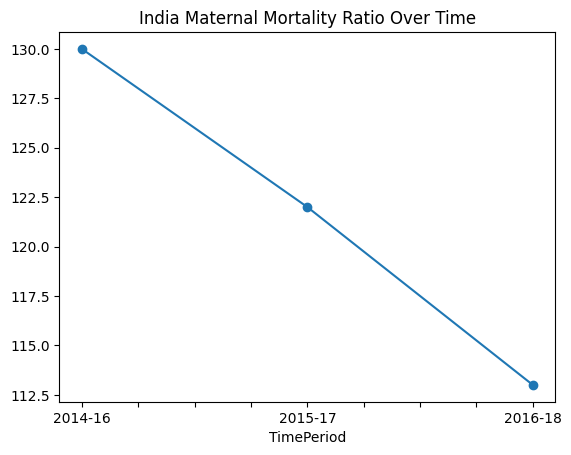

In [27]:
india_mmr = mmr_df.groupby('TimePeriod')['DataValue'].mean()
india_mmr.plot(kind='line', title='India Maternal Mortality Ratio Over Time', marker='o')


In [28]:
anc_df = df[df['Indicator'].str.contains("Antenatal care", case=False)]
merged = mmr_df.merge(anc_df, on=["AreaName", "TimePeriod"], suffixes=('_MMR', '_ANC'))

# Convert DataValue to float
merged['DataValue_MMR'] = pd.to_numeric(merged['DataValue_MMR'], errors='coerce')
merged['DataValue_ANC'] = pd.to_numeric(merged['DataValue_ANC'], errors='coerce')

# Correlation
correlation = merged[['DataValue_MMR', 'DataValue_ANC']].corr()
print(correlation)


               DataValue_MMR  DataValue_ANC
DataValue_MMR            NaN            NaN
DataValue_ANC            NaN            NaN


In [29]:
skilled_births_df = df[df['Indicator'].str.contains("Skilled health personnel", case=False)]
low_skilled = skilled_births_df.groupby('AreaName')['DataValue'].mean().sort_values().head(10)
print(low_skilled)


AreaName
India    82.9
Name: DataValue, dtype: float64


In [30]:
mmr_df['DataValue'] = pd.to_numeric(mmr_df['DataValue'], errors='coerce')
mmr_df['Status'] = mmr_df['DataValue'].apply(lambda x: '✅ Met Goal' if x < 70 else '❌ Not Met')
status_count = mmr_df.groupby('AreaName')['Status'].value_counts().unstack().fillna(0)
print(status_count)


Status    ❌ Not Met
AreaName           
India             3


In [31]:
teen_birth_df = df[df['Indicator'].str.contains("Adolescent birth rate", case=False)]
teen_avg = teen_birth_df.groupby('AreaName')['DataValue'].mean().sort_values(ascending=False).head(10)
print(teen_avg)


AreaName
India    11.75
Name: DataValue, dtype: float64


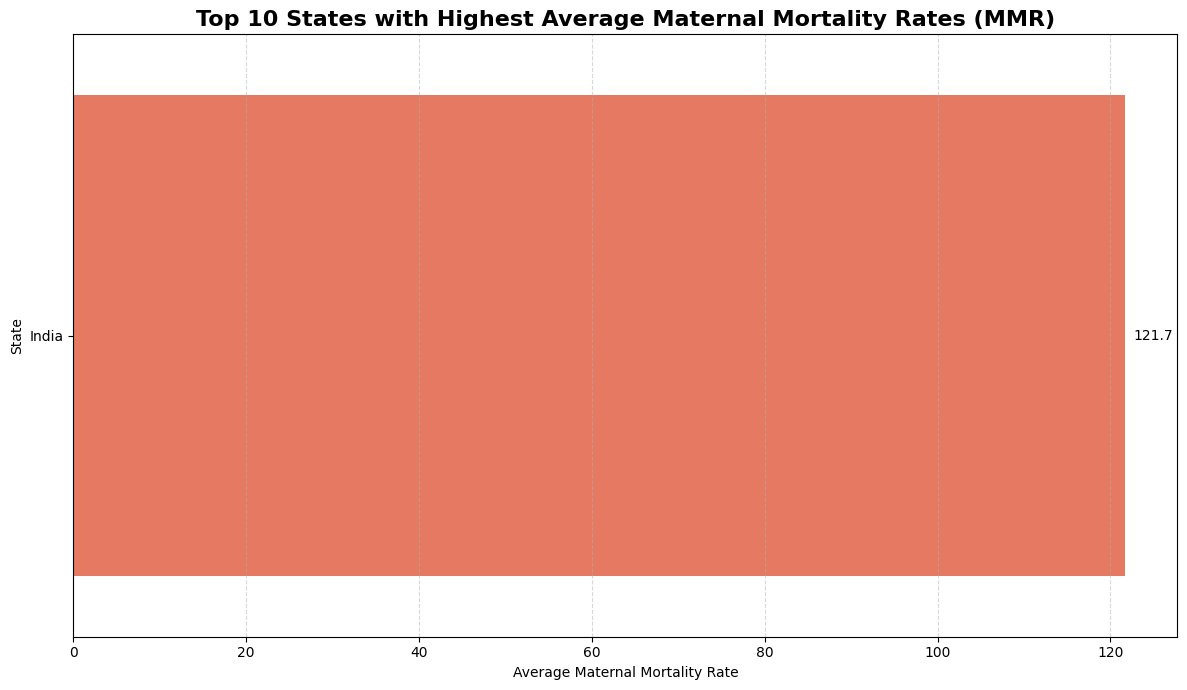

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DataValue to numeric
df["DataValue"] = pd.to_numeric(df["DataValue"], errors='coerce')

# Filter rows that contain "Maternal" in the Indicator column
mmr_df = df[df['Indicator'].str.contains("Maternal", case=False, na=False)]

# Group by AreaName and calculate average MMR
avg_mmr = mmr_df.groupby("AreaName")["DataValue"].mean().dropna().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_mmr.values, y=avg_mmr.index, palette="Reds_r")

# Add value labels to bars
for index, value in enumerate(avg_mmr.values):
    plt.text(value + 1, index, f"{value:.1f}", va='center', fontsize=10)

plt.title("Top 10 States with Highest Average Maternal Mortality Rates (MMR)", fontsize=16, fontweight='bold')
plt.xlabel("Average Maternal Mortality Rate")
plt.ylabel("State")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


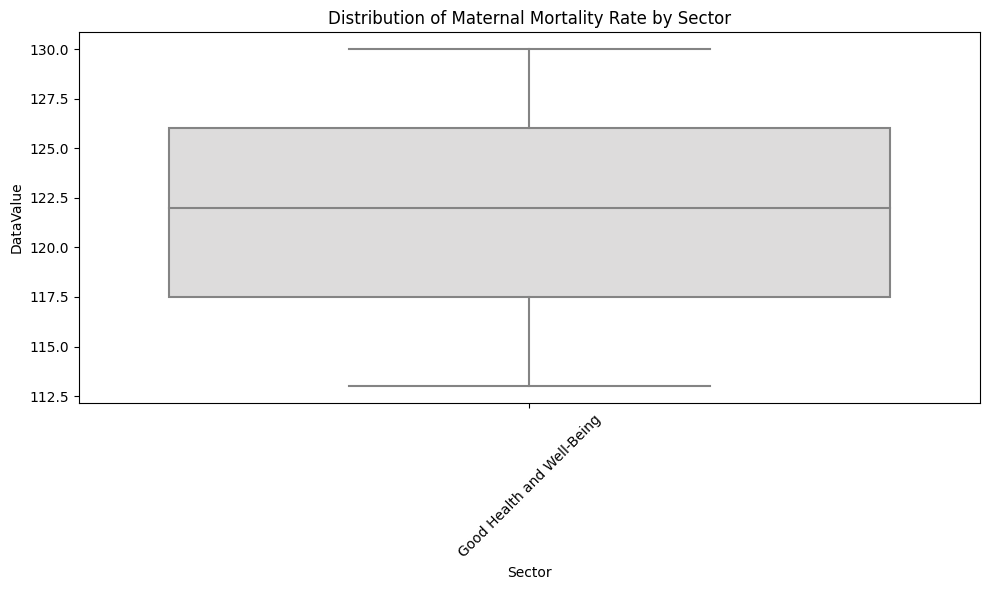

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mmr_df, x="Sector", y="DataValue", palette="coolwarm")
plt.title("Distribution of Maternal Mortality Rate by Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


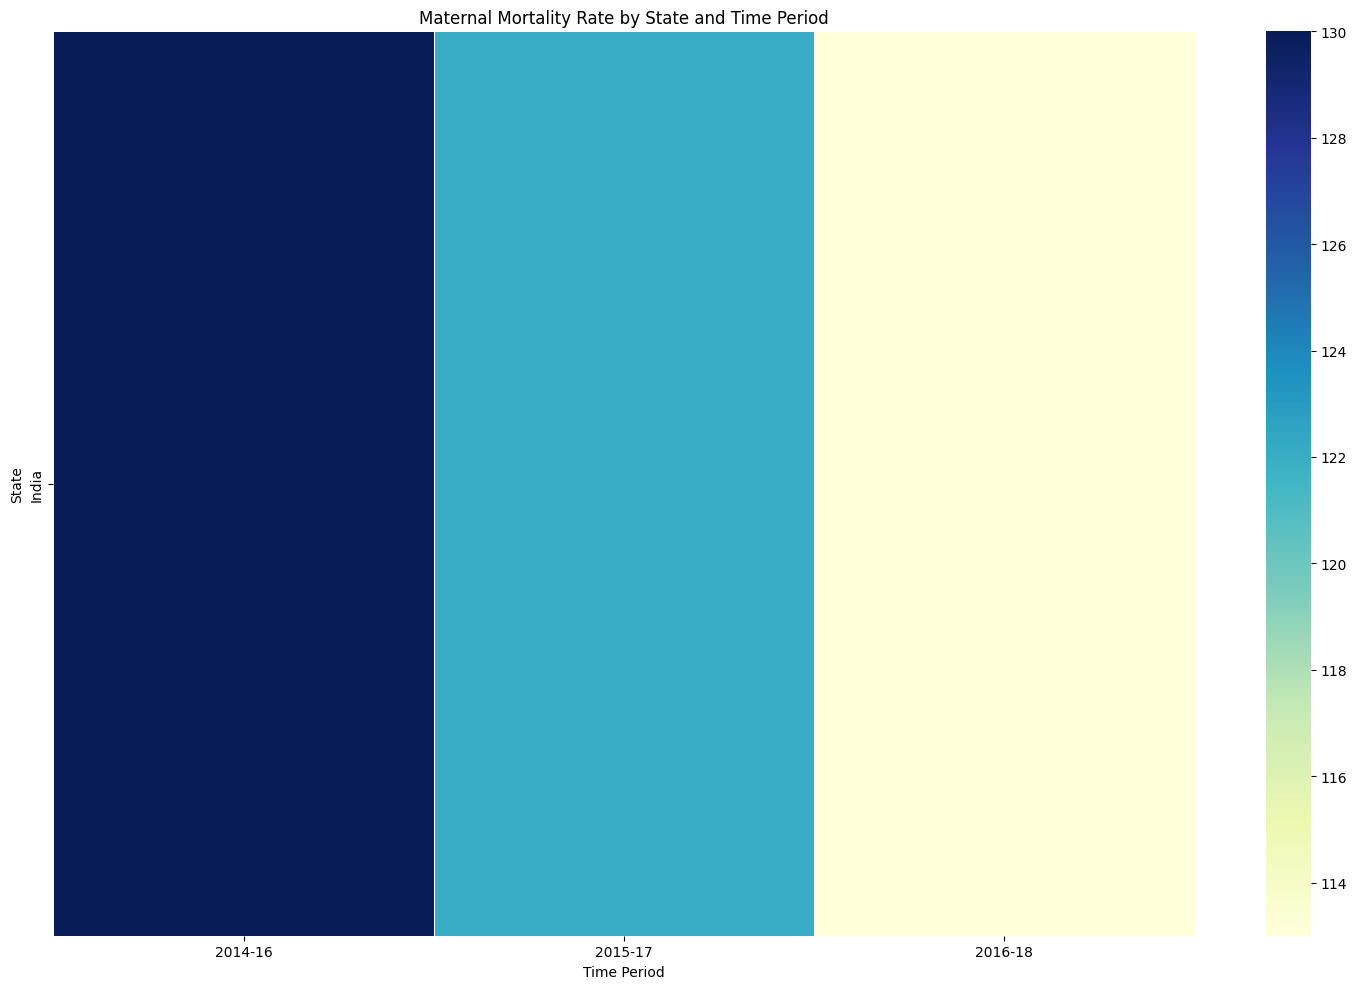

In [35]:
# Pivot for heatmap
heatmap_data = mmr_df.pivot_table(values="DataValue", index="AreaName", columns="TimePeriod")

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linecolor="white", linewidths=0.5)
plt.title("Maternal Mortality Rate by State and Time Period")
plt.xlabel("Time Period")
plt.ylabel("State")
plt.tight_layout()
plt.show()


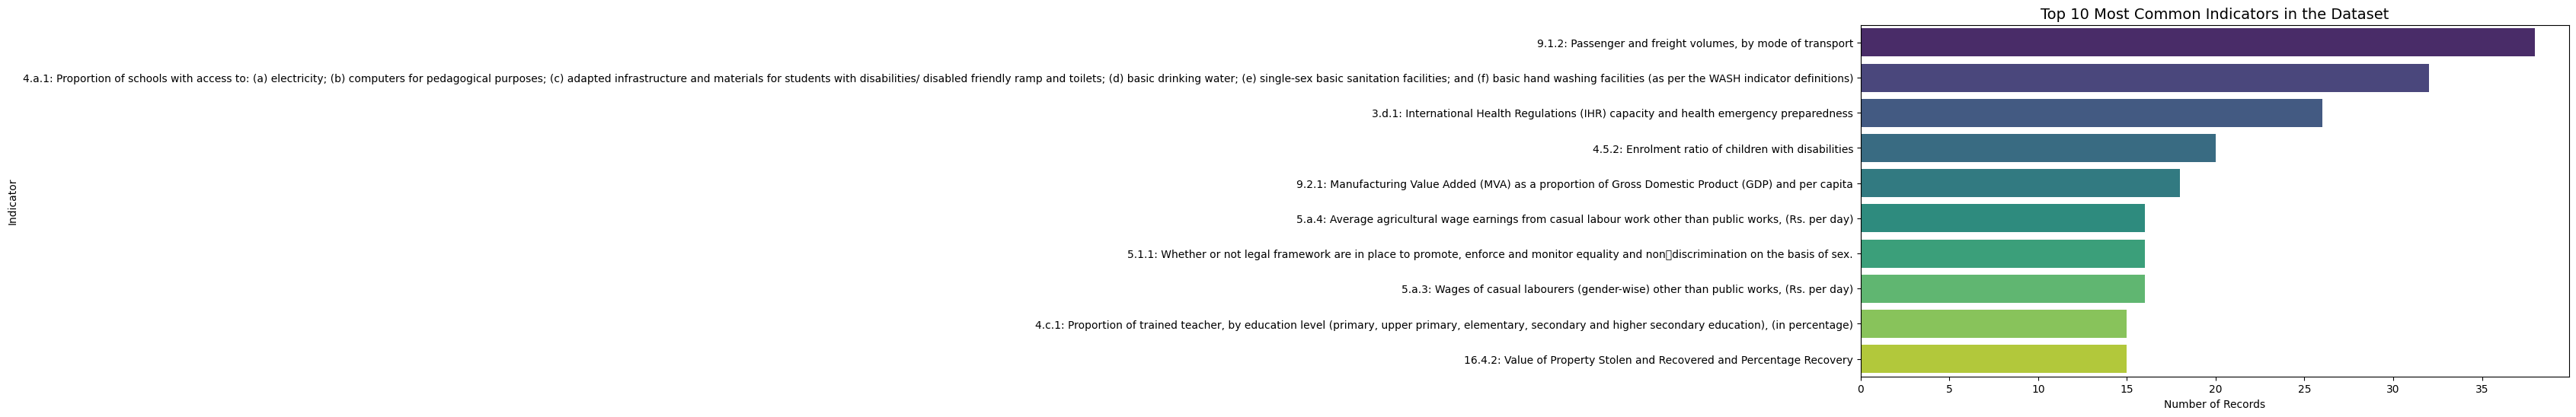

In [36]:
top_indicators = df["Indicator"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_indicators.index, x=top_indicators.values, palette="viridis")
plt.title("Top 10 Most Common Indicators in the Dataset", fontsize=14)
plt.xlabel("Number of Records")
plt.ylabel("Indicator")
plt.tight_layout()
plt.show()


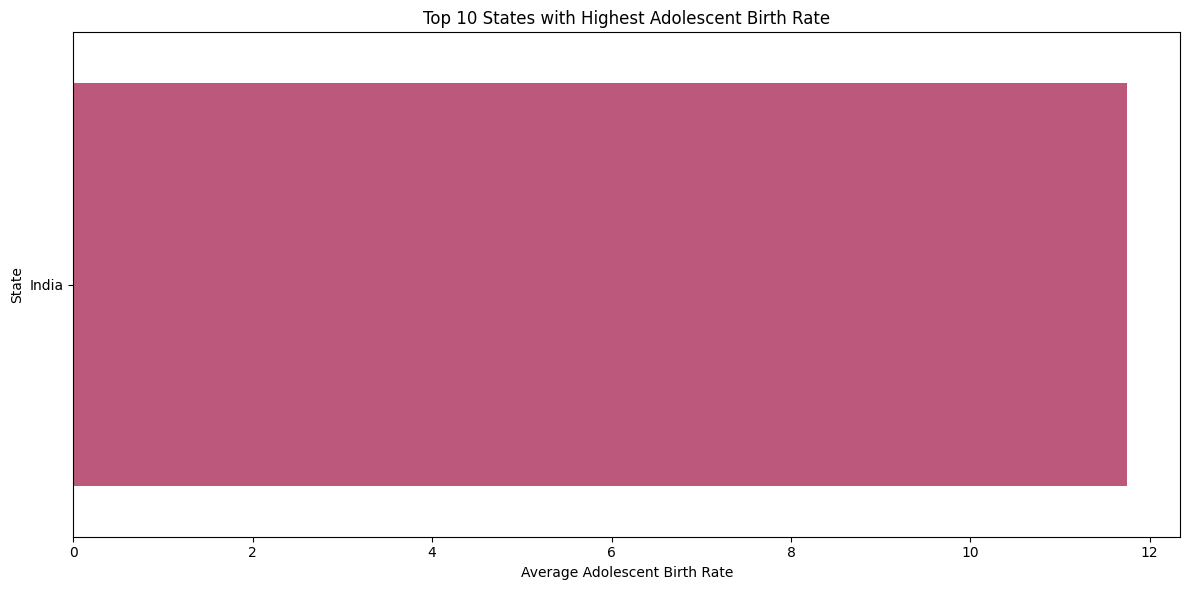

In [38]:
adolescent_df = df[df["Indicator"].str.contains("adolescent birth", case=False)]

# Average per state
avg_adolescent = adolescent_df.groupby("AreaName")["DataValue"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_adolescent.values, y=avg_adolescent.index, palette="plasma")
plt.title("Top 10 States with Highest Adolescent Birth Rate")
plt.xlabel("Average Adolescent Birth Rate")
plt.ylabel("State")
plt.tight_layout()
plt.show()


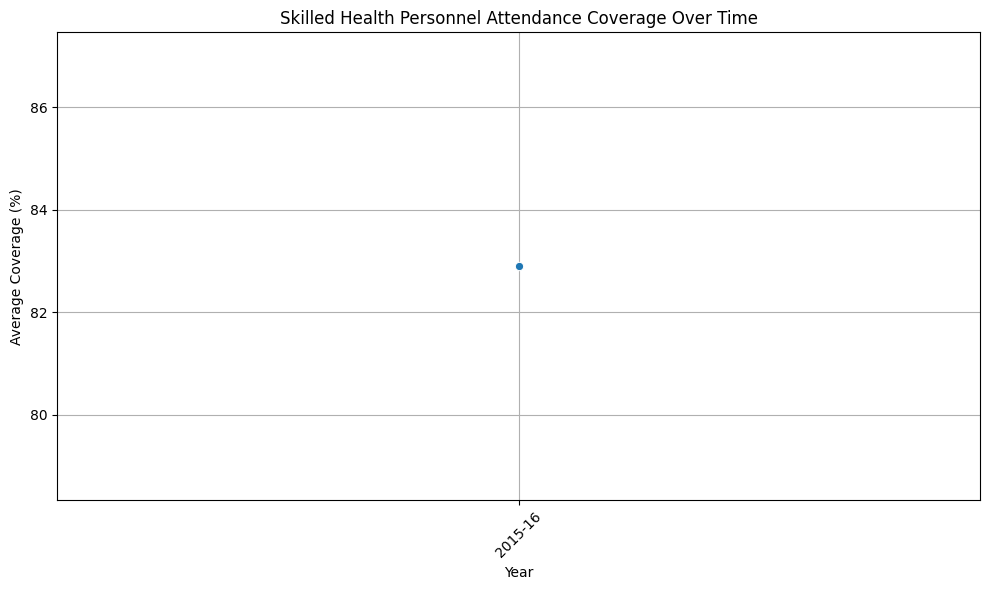

In [39]:
skilled_df = df[df["Indicator"].str.contains("skilled health personnel", case=False)]

# Group by Time
time_trend = skilled_df.groupby("TimePeriod")["DataValue"].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=time_trend.index, y=time_trend.values, marker='o')
plt.title("Skilled Health Personnel Attendance Coverage Over Time")
plt.xlabel("Year")
plt.ylabel("Average Coverage (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


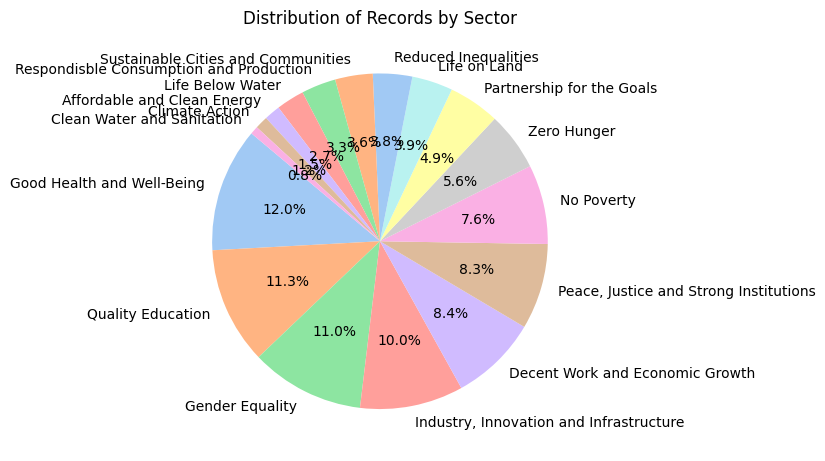

In [40]:
sector_counts = df['Sector'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Records by Sector")
plt.tight_layout()
plt.show()


## Conclusion

This project provided key insights into maternal health indicators across different areas and subgroups using IBM’s dataset. We identified regional disparities, visualized trends, and highlighted critical indicators that need more attention. This analysis can help policymakers and healthcare organizations make informed decisions and allocate resources effectively to improve maternal healthcare quality.

Further improvements can include time-series trend analysis and correlation between indicators and external factors like socioeconomic data.
